# Introduction to Regression with Neural Networks in TensorFlow
- There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

## Import TensorFlow


In [1]:
import tensorflow as tf
tf.__version__

'2.14.0'

## Creating a data to fit

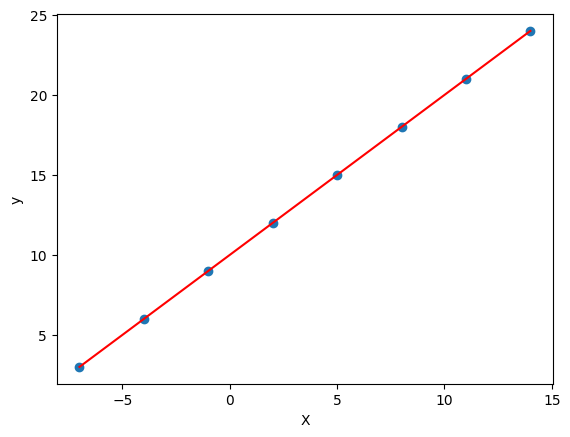

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24. ])

# Visualize
plt.scatter(X, y)
plt.plot(X, y, color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

- From graph, it can be seen that, y = X + 10.

X -> input features, independent variable
y -> output feature, dependent variable

## Input and output shapes


In [3]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

## Turn our Numpy array into tensors

In [5]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow


1.   Creating a model - define the input and output layers, as well as the hidden layers of a deep learning
2.   Compiling a model - define  the loss function ( in other words, the function that tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evalution metrics ( what we can use to interpret the performance of our model)
3. Fittin a model - letting the model try to find patterns betwene X & y (features and labels).



In [6]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

# Sequential groups a linear stack of layers into a tf.keras.Model.
# Sequential provides training and inference features on this model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # we have 1 input and want 1 output. that's why it's 1
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae => mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD => stochastic gradient descent
    metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 14.7785 - mae: 14.7785
Epoch 2/5
1/1 [==============================] - 0s 28ms/step - loss: 14.6460 - mae: 14.6460
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 14.5135 - mae: 14.5135
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 14.3810 - mae: 14.3810
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 14.2485 - mae: 14.2485


In [7]:
# Check out X, y

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Try and make a prediction using our model

In [8]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 82ms/step


array([[-3.185071]], dtype=float32)

- Performance of our model is worse than shit. We have to improve it.

## Improve our model

we can improve our model, by altering the steps we took to create a model

1.   **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2.   **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model more examples to learn from)

In [9]:
# Let's rebuild our model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 385ms/step - loss: 13.0505 - mae: 13.0505
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9180 - mae: 12.9180
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7855 - mae: 12.7855
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6530 - mae: 12.6530
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5205 - mae: 12.5205
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3880 - mae: 12.3880
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2555 - mae: 12.2555
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1230 - mae: 12.1230
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9905 - mae: 11.9905
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8580 - mae: 11.8580
Epoch 11/100
1/1 [==============================

## Try and make a prediction using our new model

In [10]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 56ms/step


array([[29.820974]], dtype=float32)

- ***It's much better than before. Let's continue to improve our model***

In [20]:
# 1. Create the model with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["mae"]
    )

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 12.8317 - mae: 12.8317
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.9529 - mae: 11.9529
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 11.0418 - mae: 11.0418
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 10.2020 - mae: 10.2020
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 9.4090 - mae: 9.4090
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 8.5680 - mae: 8.5680
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 7.6757 - mae: 7.6757
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 6.7270 - mae: 6.7270
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 5.7158 - mae: 5.7158
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 4.6353 - mae: 4.6353
Epoch 11/100
1/1 [==============================] - 0s 26ms/ste

In [21]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 80ms/step


array([[29.347176]], dtype=float32)

**It is worse than before model. Because our model is overfitted**

Common ways to improve a deep model:
1.   Adding layers
2.   Increase the number of hidden units
3.   Change the activation function
4.   Change the optimization function
5.   Change the learning rate
6.   Fitting on more data
7. Fitting for longer


